In [1]:
!pip3 install torch torchvision
!pip install torchsummary
!pip install pyunpack
!pip install patool

    100% |████████████████████████████████| 2.0MB 9.8MB/s 
  Found existing installation: Pillow 4.0.0
    Uninstalling Pillow-4.0.0:
      Successfully uninstalled Pillow-4.0.0
  [PIL]
You must restart the runtime in order to use newly installed versions.
  Running setup.py bdist_wheel for pyunpack ... - \ | / done
  Stored in directory: /root/.cache/pip/wheels/af/44/08/60613970881e542c0baad1f2dea5ed8e6716bc573f49197b7e
  Running setup.py bdist_wheel for easyprocess ... - \ | / done
  Stored in directory: /root/.cache/pip/wheels/41/22/19/af15ef6264c58b625a82641ed7483ad05e258fbd8925505227
Successfully built pyunpack easyprocess
    100% |████████████████████████████████| 81kB 2.8MB/s 


In [0]:
import torch.nn as nn
import torch.nn.functional as F
import torch
from torchsummary import summary
from torch.autograd import Variable
from logging import Logger
from skimage.color import rgb2lab, lab2rgb, rgb2gray, xyz2lab
from skimage.io import imsave

In [36]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"sanchit2843","key":"60f3bf5b207ec03851f344c9a6984da9"}'}

In [0]:
!pip install -q kaggle
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [38]:
!kaggle datasets download -d moltean/fruits

100% 657M/658M [00:16<00:00, 31.3MB/s]
100% 658M/658M [00:16<00:00, 42.2MB/s]


In [39]:
!unzip fruits.zip

Archive:  fruits.zip
   creating: fruits-360/
  inflating: fruits-360/LICENSE      
   creating: fruits-360/papers/
  inflating: fruits-360/readme.md    
   creating: fruits-360/test-multiple_fruits/
  inflating: fruits-360/test-multiple_fruits/apple_apricot_nectarine_peach_peach(flat)_pomegranate_pear_plum.jpg  
  inflating: fruits-360/test-multiple_fruits/apple_apricot_peach_peach(flat)_pomegranate_pear_plum.jpg  
  inflating: fruits-360/test-multiple_fruits/apple_apricot_peach_peach(flat)_pomegranate_pear_plum_2.jpg  
  inflating: fruits-360/test-multiple_fruits/apple_apricot_peach_peach(flat)_pomegranate_pear_plum_3.jpg  
   creating: fruits-360/Training/
   creating: fruits-360/Training/Apple Braeburn/
  inflating: fruits-360/Training/Apple Braeburn/0_100.jpg  
  inflating: fruits-360/Training/Apple Braeburn/100_100.jpg  
  inflating: fruits-360/Training/Apple Braeburn/101_100.jpg  
  inflating: fruits-360/Training/Apple Braeburn/102_100.jpg  
  inflating: fruits-360/Training/Appl

In [5]:
!unzip images.zip

Archive:  images.zip
   creating: images/
   creating: images/architecure/
  inflating: images/architecure/02004_Apse_of_Santa_Maria_Maggiore_(Rome).jpg  
  inflating: images/architecure/04_Monasterio_de_Palazuelos_absides_exterior_ni.jpg  
  inflating: images/architecure/10005682614_109bceeb1c_m.jpg  
  inflating: images/architecure/10009861843_54f0dbd2cc_n.jpg  
  inflating: images/architecure/10015159004_5f525f946d.jpg  
  inflating: images/architecure/10015181954_3e5dabf1d9_m.jpg  
  inflating: images/architecure/1002640661_c6adc3335c_m.jpg  
  inflating: images/architecure/10030500583_95031775a4_m.jpg  
  inflating: images/architecure/10037315644_6c99b3350b_m.jpg  
  inflating: images/architecure/10037324714_ca79f1e2ec_m.jpg  
  inflating: images/architecure/10037339496_a8396efda0_m.jpg  
  inflating: images/architecure/10037658236_5bf8e5b7b4_m.jpg  
  inflating: images/architecure/10050306154_64cd345ca5.jpg  
  inflating: images/architecure/10050779306_83dd312c56_m.jpg  
  inflat

In [10]:
import os
print(os.listdir('/content/images'))

['architecure', 'art and culture', 'food and d rinks', 'travel and  adventure']


In [0]:
!mkdir train

In [0]:
import shutil
import os
a = os.listdir('/content/images')
path = '/content/images'
des = '/content/train'
for j in a:
  path1 = os.path.join(path,j)
  b = os.listdir(path1)
  for i in b:
    path2 = os.path.join(path1,i)
    des1 = os.path.join(des,i)
    shutil.copyfile(path2,des1)

In [0]:
import torch.nn as nn
import torch.utils.model_zoo as model_zoo


__all__ = ['ResNet', 'resnet18', 'resnet34', 'resnet50', 'resnet101',
           'resnet152']


model_urls = {
    'resnet18': 'https://download.pytorch.org/models/resnet18-5c106cde.pth',
    'resnet34': 'https://download.pytorch.org/models/resnet34-333f7ec4.pth',
    'resnet50': 'https://download.pytorch.org/models/resnet50-19c8e357.pth',
    'resnet101': 'https://download.pytorch.org/models/resnet101-5d3b4d8f.pth',
    'resnet152': 'https://download.pytorch.org/models/resnet152-b121ed2d.pth',
}


def conv3x3(in_planes, out_planes, stride=1):
    """3x3 convolution with padding"""
    return nn.Conv2d(in_planes, out_planes, kernel_size=3, stride=stride,
                     padding=1, bias=False)


def conv1x1(in_planes, out_planes, stride=1):
    """1x1 convolution"""
    return nn.Conv2d(in_planes, out_planes, kernel_size=1, stride=stride, bias=False)


class BasicBlock(nn.Module):
    expansion = 1

    def __init__(self, inplanes, planes, stride=1, downsample=None):
        super(BasicBlock, self).__init__()
        self.conv1 = conv3x3(inplanes, planes, stride)
        self.bn1 = nn.BatchNorm2d(planes)
        self.relu = nn.ReLU(inplace=True)
        self.conv2 = conv3x3(planes, planes)
        self.bn2 = nn.BatchNorm2d(planes)
        self.downsample = downsample
        self.stride = stride

    def forward(self, x):
        identity = x

        out = self.conv1(x)
        out = self.bn1(out)
        out = self.relu(out)

        out = self.conv2(out)
        out = self.bn2(out)

        if self.downsample is not None:
            identity = self.downsample(x)

        out += identity
        out = self.relu(out)

        return out


class Bottleneck(nn.Module):
    expansion = 4

    def __init__(self, inplanes, planes, stride=1, downsample=None):
        super(Bottleneck, self).__init__()
        self.conv1 = conv1x1(inplanes, planes)
        self.bn1 = nn.BatchNorm2d(planes)
        self.conv2 = conv3x3(planes, planes, stride)
        self.bn2 = nn.BatchNorm2d(planes)
        self.conv3 = conv1x1(planes, planes * self.expansion)
        self.bn3 = nn.BatchNorm2d(planes * self.expansion)
        self.relu = nn.ReLU(inplace=True)
        self.downsample = downsample
        self.stride = stride

    def forward(self, x):
        identity = x

        out = self.conv1(x)
        out = self.bn1(out)
        out = self.relu(out)

        out = self.conv2(out)
        out = self.bn2(out)
        out = self.relu(out)

        out = self.conv3(out)
        out = self.bn3(out)

        if self.downsample is not None:
            identity = self.downsample(x)

        out += identity
        out = self.relu(out)

        return out


class ResNet(nn.Module):

    def __init__(self, block, layers, num_classes=1000, zero_init_residual=False):
        super(ResNet, self).__init__()
        self.inplanes = 64
        self.conv1 = nn.Conv2d(3, 64, kernel_size=7, stride=2, padding=3,
                               bias=False)
        self.bn1 = nn.BatchNorm2d(64)
        self.relu = nn.ReLU(inplace=True)
        self.maxpool = nn.MaxPool2d(kernel_size=3, stride=2, padding=1)
        self.layer1 = self._make_layer(block, 64, layers[0])
        self.layer2 = self._make_layer(block, 128, layers[1], stride=2)
        self.layer3 = self._make_layer(block, 256, layers[2], stride=2)
        self.layer4 = self._make_layer(block, 512, layers[3], stride=2)
        self.avgpool = nn.AdaptiveAvgPool2d((1, 1))
        self.fc = nn.Linear(512 * block.expansion, num_classes)

        for m in self.modules():
            if isinstance(m, nn.Conv2d):
                nn.init.kaiming_normal_(m.weight, mode='fan_out', nonlinearity='relu')
            elif isinstance(m, nn.BatchNorm2d):
                nn.init.constant_(m.weight, 1)
                nn.init.constant_(m.bias, 0)

        # Zero-initialize the last BN in each residual branch,
        # so that the residual branch starts with zeros, and each residual block behaves like an identity.
        # This improves the model by 0.2~0.3% according to https://arxiv.org/abs/1706.02677
        if zero_init_residual:
            for m in self.modules():
                if isinstance(m, Bottleneck):
                    nn.init.constant_(m.bn3.weight, 0)
                elif isinstance(m, BasicBlock):
                    nn.init.constant_(m.bn2.weight, 0)

    def _make_layer(self, block, planes, blocks, stride=1):
        downsample = None
        if stride != 1 or self.inplanes != planes * block.expansion:
            downsample = nn.Sequential(
                conv1x1(self.inplanes, planes * block.expansion, stride),
                nn.BatchNorm2d(planes * block.expansion),
            )

        layers = []
        layers.append(block(self.inplanes, planes, stride, downsample))
        self.inplanes = planes * block.expansion
        for _ in range(1, blocks):
            layers.append(block(self.inplanes, planes))

        return nn.Sequential(*layers)

    def forward(self, x):
        x = self.conv1(x)
        x = self.bn1(x)
        x = self.relu(x)
        x = self.maxpool(x)
        x = self.layer1(x)
        x = self.layer2(x)
        x = self.layer3(x)
        x = self.layer4(x)

        return x


def resnet18(pretrained=False, **kwargs):
    """Constructs a ResNet-18 model.
    Args:
        pretrained (bool): If True, returns a model pre-trained on ImageNet
    """
    model = ResNet(BasicBlock, [2, 2, 2, 2], **kwargs)
    if pretrained:
        model.load_state_dict(model_zoo.load_url(model_urls['resnet18']))
    return model


def resnet34(pretrained=False, **kwargs):
    """Constructs a ResNet-34 model.
    Args:
        pretrained (bool): If True, returns a model pre-trained on ImageNet
    """
    model = ResNet(BasicBlock, [3, 4, 6, 3], **kwargs)
    if pretrained:
        model.load_state_dict(model_zoo.load_url(model_urls['resnet34']))
    return model


def resnet50(pretrained=False, **kwargs):
    """Constructs a ResNet-50 model.
    Args:
        pretrained (bool): If True, returns a model pre-trained on ImageNet
    """
    model = ResNet(Bottleneck, [3, 4, 6, 3], **kwargs)
    if pretrained:
        model.load_state_dict(model_zoo.load_url(model_urls['resnet50']))
    return model


def resnet101(pretrained=False, **kwargs):
    """Constructs a ResNet-101 model.
    Args:
        pretrained (bool): If True, returns a model pre-trained on ImageNet
    """
    model = ResNet(Bottleneck, [3, 4, 23, 3], **kwargs)
    if pretrained:
        model.load_state_dict(model_zoo.load_url(model_urls['resnet101']))
    return model


def resnet152(pretrained=False, **kwargs):
    """Constructs a ResNet-152 model.
    Args:
        pretrained (bool): If True, returns a model pre-trained on ImageNet
    """
    model = ResNet(Bottleneck, [3, 8, 36, 3], **kwargs)
    if pretrained:
        model.load_state_dict(model_zoo.load_url(model_urls['resnet152']))
    return model

In [4]:
# input to output
class Generator_1(nn.Module):
  def __init__(self):
    super(Generator_1,self).__init__()
    self.input = nn.Conv2d(1,3,kernel_size = 7)
    self.resnet = resnet18(pretrained = True)
    self.conv1 = nn.Sequential(
                                nn.Upsample(scale_factor=2, mode='bilinear', align_corners=True),
                                nn.Conv2d(512,128,kernel_size = 3,stride = 1 , padding = 1),
                                nn.BatchNorm2d(128),
                                nn.LeakyReLU(0.5)
                              )
    self.conv2 = nn.Sequential(
                                nn.Upsample(scale_factor=2, mode='bilinear', align_corners=True),
                                nn.Conv2d(128,64,kernel_size = 3,stride = 1 , padding = 1),
                                nn.BatchNorm2d(64),
                                nn.LeakyReLU(0.5)
                              )
    self.conv3 = nn.Sequential(
                                nn.Upsample(scale_factor=2, mode='bilinear', align_corners=True),
                                nn.ConvTranspose2d(64,32, kernel_size = 4,stride = 2 , padding = 1),
                                nn.BatchNorm2d(32),
                                nn.LeakyReLU(0.5)
                              )
    self.conv4 = nn.Sequential(
                                nn.Upsample(scale_factor=2, mode='bilinear', align_corners=True),
                                nn.Conv2d(32,2, kernel_size = 3,stride = 1 , padding = 1),
                                nn.BatchNorm2d(2),
                                nn.LeakyReLU(0.5)
                              )
  def forward(self,x):
    x = self.input(x)
    x = self.resnet(x)
    x = self.conv1(x)
    x = self.conv2(x)    
    x = self.conv3(x)
    x = self.conv4(x)
    
    x = F.tanh(x)
    return x
  

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
G_BC = Generator_1().to(device)
summary(G_BC, (1, 256, 256))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1          [-1, 3, 250, 250]             150
            Conv2d-2         [-1, 64, 125, 125]           9,408
       BatchNorm2d-3         [-1, 64, 125, 125]             128
              ReLU-4         [-1, 64, 125, 125]               0
         MaxPool2d-5           [-1, 64, 63, 63]               0
            Conv2d-6           [-1, 64, 63, 63]          36,864
       BatchNorm2d-7           [-1, 64, 63, 63]             128
              ReLU-8           [-1, 64, 63, 63]               0
            Conv2d-9           [-1, 64, 63, 63]          36,864
      BatchNorm2d-10           [-1, 64, 63, 63]             128
             ReLU-11           [-1, 64, 63, 63]               0
       BasicBlock-12           [-1, 64, 63, 63]               0
           Conv2d-13           [-1, 64, 63, 63]          36,864
      BatchNorm2d-14           [-1, 64,

/usr/local/lib/python3.6/dist-packages/torch/nn/modules/upsampling.py:129: UserWarning: nn.Upsample is deprecated. Use nn.functional.interpolate instead.
  warnings.warn("nn.{} is deprecated. Use nn.functional.interpolate instead.".format(self.name))
/usr/local/lib/python3.6/dist-packages/torch/nn/functional.py:1320: UserWarning: nn.functional.tanh is deprecated. Use torch.tanh instead.
  warnings.warn("nn.functional.tanh is deprecated. Use torch.tanh instead.")


In [5]:
# input to output
class Generator_2(nn.Module):
  def __init__(self):
    super(Generator_2,self).__init__()
    self.input = nn.Conv2d(2,3,kernel_size = 7)
    
    self.resnet = resnet18(pretrained = True)
    self.conv1 = nn.Sequential(
                                nn.Upsample(scale_factor=2, mode='bilinear', align_corners=True),
                                nn.Conv2d(512,128,kernel_size = 3,stride = 1 , padding = 1),
                                nn.BatchNorm2d(128),
                                nn.LeakyReLU(0.5)
                              )
    self.conv2 = nn.Sequential(
                                nn.Upsample(scale_factor=2, mode='bilinear', align_corners=True),
                                nn.Conv2d(128,64,kernel_size = 3,stride = 1 , padding = 1),
                                nn.BatchNorm2d(64),
                                nn.LeakyReLU(0.5)
                              )
    self.conv3 = nn.Sequential(
                                nn.Upsample(scale_factor=2, mode='bilinear', align_corners=True),
                                nn.ConvTranspose2d(64,32, kernel_size = 4,stride = 2 , padding = 1),
                                nn.BatchNorm2d(32),
                                nn.LeakyReLU(0.5)
                              )
    self.conv4 = nn.Sequential(
                                nn.Upsample(scale_factor=2, mode='bilinear', align_corners=True),
                                nn.Conv2d(32,1, kernel_size = 3,stride = 1 , padding = 1),
                                nn.BatchNorm2d(1),
                                nn.LeakyReLU(0.5)
                              )
  def forward(self,x):
    x = self.input(x)
    x = self.resnet(x)
    x = self.conv1(x)
    x = self.conv2(x)    
    x = self.conv3(x)
    x = self.conv4(x)
    
    x = F.tanh(x)
    return x
  

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
G_CB = Generator_2().to(device)
summary(G_CB, (2, 256, 256))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1          [-1, 3, 250, 250]             297
            Conv2d-2         [-1, 64, 125, 125]           9,408
       BatchNorm2d-3         [-1, 64, 125, 125]             128
              ReLU-4         [-1, 64, 125, 125]               0
         MaxPool2d-5           [-1, 64, 63, 63]               0
            Conv2d-6           [-1, 64, 63, 63]          36,864
       BatchNorm2d-7           [-1, 64, 63, 63]             128
              ReLU-8           [-1, 64, 63, 63]               0
            Conv2d-9           [-1, 64, 63, 63]          36,864
      BatchNorm2d-10           [-1, 64, 63, 63]             128
             ReLU-11           [-1, 64, 63, 63]               0
       BasicBlock-12           [-1, 64, 63, 63]               0
           Conv2d-13           [-1, 64, 63, 63]          36,864
      BatchNorm2d-14           [-1, 64,

/usr/local/lib/python3.6/dist-packages/torch/nn/modules/upsampling.py:129: UserWarning: nn.Upsample is deprecated. Use nn.functional.interpolate instead.
  warnings.warn("nn.{} is deprecated. Use nn.functional.interpolate instead.".format(self.name))
/usr/local/lib/python3.6/dist-packages/torch/nn/functional.py:1320: UserWarning: nn.functional.tanh is deprecated. Use torch.tanh instead.
  warnings.warn("nn.functional.tanh is deprecated. Use torch.tanh instead.")


In [29]:
class Discriminator_1(nn.Module):
  def __init__(self):
    super(Discriminator_1,self).__init__()
    self.conv1 = nn.Sequential(
                                nn.Conv2d(1,32,kernel_size = 4,stride = 2),
                                nn.BatchNorm2d(32),
                                nn.MaxPool2d(2),
                                nn.LeakyReLU(0.5)
                              )
    self.conv2 = nn.Sequential(
                                nn.Conv2d(32,64,kernel_size = 4,stride = 2),
                                nn.BatchNorm2d(64),
                                nn.MaxPool2d(2),
                                
                                nn.LeakyReLU(0.5)
                              )
    self.conv3 = nn.Sequential(
                                nn.Conv2d(64,128,kernel_size = 3,stride = 1),
                                nn.BatchNorm2d(128),
                                nn.MaxPool2d(2),
                                
                                nn.LeakyReLU(0.5)
                              )

    self.fc1 = nn.Sequential( 
                                nn.Linear(4608, 512),
                                nn.LeakyReLU(0.2),
                                nn.Dropout(0.3)
                            )
    self.fc2 = nn.Sequential( 
                                nn.Linear(512, 128),
                                nn.LeakyReLU(0.2),
                                nn.Dropout(0.3)
                            )
    self.fc3 = nn.Sequential( 
                                nn.Linear(128, 1),                             
                            )
    
  def forward(self,x):
    x = self.conv1(x)
    x = self.conv2(x)
    x = self.conv3(x)

    x = x.view(-1,4608)
    x = self.fc1(x)
    x = self.fc2(x)
    x = self.fc3(x)
    x = F.sigmoid(x)
    return x
D_C = Discriminator_1().to(device)
summary(D_C, (1, 256, 256))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1         [-1, 32, 127, 127]             544
       BatchNorm2d-2         [-1, 32, 127, 127]              64
         MaxPool2d-3           [-1, 32, 63, 63]               0
         LeakyReLU-4           [-1, 32, 63, 63]               0
            Conv2d-5           [-1, 64, 30, 30]          32,832
       BatchNorm2d-6           [-1, 64, 30, 30]             128
         MaxPool2d-7           [-1, 64, 15, 15]               0
         LeakyReLU-8           [-1, 64, 15, 15]               0
            Conv2d-9          [-1, 128, 13, 13]          73,856
      BatchNorm2d-10          [-1, 128, 13, 13]             256
        MaxPool2d-11            [-1, 128, 6, 6]               0
        LeakyReLU-12            [-1, 128, 6, 6]               0
           Linear-13                  [-1, 512]       2,359,808
        LeakyReLU-14                  [

/usr/local/lib/python3.6/dist-packages/torch/nn/functional.py:1332: UserWarning: nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.
  warnings.warn("nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.")


In [28]:
class Discriminator_2(nn.Module):
  def __init__(self):
    super(Discriminator_2,self).__init__()
    self.conv1 = nn.Sequential(
                                nn.Conv2d(2,32,kernel_size = 4,stride = 2),
                                nn.BatchNorm2d(32),
                                nn.MaxPool2d(2),
                                nn.LeakyReLU(0.5)
                              )
    self.conv2 = nn.Sequential(
                                nn.Conv2d(32,64,kernel_size = 4,stride = 2),
                                nn.BatchNorm2d(64),
                                nn.MaxPool2d(2),
                                
                                nn.LeakyReLU(0.5)
                              )
    self.conv3 = nn.Sequential(
                                nn.Conv2d(64,128,kernel_size = 3,stride = 1),
                                nn.BatchNorm2d(128),
                                nn.MaxPool2d(2),
                                
                                nn.LeakyReLU(0.5)
                              )

    self.fc1 = nn.Sequential( 
                                nn.Linear(4608, 512),
                                nn.LeakyReLU(0.2),
                                nn.Dropout(0.3)
                            )
    self.fc2 = nn.Sequential( 
                                nn.Linear(512, 128),
                                nn.LeakyReLU(0.2),
                                nn.Dropout(0.3)
                            )
    self.fc3 = nn.Sequential( 
                                nn.Linear(128, 1),                             
                            )
    
  def forward(self,x):
    x = self.conv1(x)
    x = self.conv2(x)
    x = self.conv3(x)

    x = x.view(-1,4608)
    x = self.fc1(x)
    x = self.fc2(x)
    x = self.fc3(x)
    x = F.sigmoid(x)
    return x
D_B = Discriminator_2().to(device)
summary(D_B, (2, 256, 256))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1         [-1, 32, 127, 127]           1,056
       BatchNorm2d-2         [-1, 32, 127, 127]              64
         MaxPool2d-3           [-1, 32, 63, 63]               0
         LeakyReLU-4           [-1, 32, 63, 63]               0
            Conv2d-5           [-1, 64, 30, 30]          32,832
       BatchNorm2d-6           [-1, 64, 30, 30]             128
         MaxPool2d-7           [-1, 64, 15, 15]               0
         LeakyReLU-8           [-1, 64, 15, 15]               0
            Conv2d-9          [-1, 128, 13, 13]          73,856
      BatchNorm2d-10          [-1, 128, 13, 13]             256
        MaxPool2d-11            [-1, 128, 6, 6]               0
        LeakyReLU-12            [-1, 128, 6, 6]               0
           Linear-13                  [-1, 512]       2,359,808
        LeakyReLU-14                  [

/usr/local/lib/python3.6/dist-packages/torch/nn/functional.py:1332: UserWarning: nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.
  warnings.warn("nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.")


In [0]:
import torch.optim as optim
d_B_optimizer = optim.RMSprop(D_B.parameters(), lr=0.000001)
d_C_optimizer = optim.RMSprop(D_C.parameters(), lr=0.000001)
g_BC_optimizer = optim.RMSprop(G_BC.parameters(), lr=0.01)
g_CB_optimizer = optim.RMSprop(G_CB.parameters(), lr=0.01)

criterion_GAN = torch.nn.MSELoss()
criterion_cycle = torch.nn.L1Loss()

In [0]:
def ones_target(size):
    '''
    Tensor containing ones, with shape = size
    '''
    data = Variable(torch.ones(size, 1))
    data = data.type(torch.cuda.FloatTensor)
    return data

def zeros_target(size):
    '''
    Tensor containing zeros, with shape = size
    '''
    data = Variable(torch.zeros(size, 1))
    data = data.type(torch.cuda.FloatTensor)
    return data

In [0]:
!mkdir generated

In [0]:
import cv2
from torch.utils.data import Dataset, DataLoader
class DataLoader(Dataset):
  def __init__(self,root_dir):
    self.a = os.listdir(root_dir)
    self.root_dir = root_dir
  def __len__(self):
      return len(self.a)
  def __getitem__(self, idx):
      img_name = os.path.join(self.root_dir, self.a[idx])
      target = cv2.imread(img_name)
      target = cv2.resize(target,(256,256))
      input_img = rgb2lab(1.0/255*target)[:,:,0]
      target = rgb2lab(1.0/255*target)[:,:,1:]
      target = target/128
      return input_img,target

In [0]:
import os
root_dir = '/content/train'
dataset = DataLoader(root_dir)

In [0]:
dataloader = torch.utils.data.DataLoader(dataset, batch_size = 32, shuffle = True)

In [0]:
b,c = dataset[0]

In [0]:
cur = np.zeros((256, 256, 3))
cur[:,:,0] = (b)
cur[:,:,1:] = (c*128)
d = lab2rgb(cur)

In [0]:
d = d*255

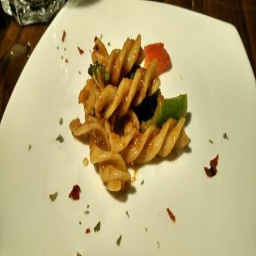

In [151]:
cv2.imwrite('image.jpg',d)
from IPython.display import Image
Image('image.jpg') 

In [34]:
import matplotlib.pyplot as plt
import cv2
from PIL import Image
import numpy as np
from IPython.display import Image
torch.backends.cudnn.benchmark=True
for epoch in range(200):
  for n_batch,(input_img,output_img) in enumerate(dataloader):
        N = input_img.size(0)
        #loss for generator B-->C
        input_img = input_img.view(N,1,256,256)
        input_img = input_img.to(device)
        input_img = input_img.type(torch.cuda.FloatTensor)
        output_img = output_img.view(N,2,256,256)
        output_img = output_img.to(device)
        output_img = output_img.type(torch.cuda.FloatTensor)
        g_BC_optimizer.zero_grad()
        g_CB_optimizer.zero_grad()
        
        G_BC.train()
        fake_data_BC = G_BC(input_img).detach()
        loss_bc = criterion_GAN(fake_data_BC,output_img)
        #loss for generator C --> B
        
        G_CB.train()
        fake_data_CB = G_CB(output_img).detach()
        loss_cb = criterion_GAN(fake_data_CB,input_img)
        loss_gan = (loss_bc+loss_cb)/2
        
        #Cycle loss
        
        recovered_B = G_CB(fake_data_BC)
        loss_cycle_B = criterion_cycle(recovered_B , input_img)
        recovered_C = G_BC(fake_data_CB)
        loss_cycle_C = criterion_cycle(recovered_C , output_img)
        loss_cycle = (loss_cycle_B + loss_cycle_C)/2
        
        # total loss gan
        loss_g = loss_gan + 10*loss_cycle
        
        # Train generator
        loss_g.backward()
        g_BC_optimizer.step()
        g_CB_optimizer.step()
        
        if(n_batch%100 == 0):
          # train Discriminator B --> C
          d_B_optimizer.zero_grad()
          real_image = D_B(output_img)
          
          loss_real = criterion_GAN(real_image , zeros_target(N))

          fake_image = D_B(fake_data_BC)
          loss_fake = criterion_GAN(fake_image , ones_target(N))
          loss_B = (loss_real + loss_fake) / 2
          loss_B.backward()
          d_B_optimizer.step()


          # Train Discriminator C --> B

          d_C_optimizer.zero_grad()
          real_image = D_C(input_img)
          
          loss_real = criterion_GAN(real_image , zeros_target(N))
          fake_image = D_C(fake_data_CB)
          loss_fake = criterion_GAN(fake_image , ones_target(N))
          loss_C = (loss_real + loss_fake) / 2
          loss_C.backward()
          d_C_optimizer.step()

        
        # Display Progress every few batches
        if(n_batch%100 ==0):
          print('epochs : {}'.format(epoch) ,  'g_error : {}'.format(loss_g) , 'd_error : {}'.format(loss_B))
        
  torch.optim.lr_scheduler.StepLR(g_optimizer, 10, gamma=0.1, last_epoch=-1)

  G_BC.eval()
  image,_ = dataset[4]
  image = torch.from_numpy(image)
  image = image.type(torch.cuda.FloatTensor)
  image = image.view(1,1,256,256)
  target = G_BC(image).detach()
  b = target.to(torch.device("cpu"))
  b = b.numpy()
  cur = np.zeros((256, 256, 3))
  cur[:,:,0] = image
  cur[:,:,1:] = (c*128)
  d = lab2rgb(cur)
  d =d*255
  cv2.imwrite('/content/generated/{}.png'.format(epoch),b)

/usr/local/lib/python3.6/dist-packages/torch/nn/modules/upsampling.py:129: UserWarning: nn.Upsample is deprecated. Use nn.functional.interpolate instead.
  warnings.warn("nn.{} is deprecated. Use nn.functional.interpolate instead.".format(self.name))
/usr/local/lib/python3.6/dist-packages/torch/nn/functional.py:1320: UserWarning: nn.functional.tanh is deprecated. Use torch.tanh instead.
  warnings.warn("nn.functional.tanh is deprecated. Use torch.tanh instead.")
/usr/local/lib/python3.6/dist-packages/torch/nn/functional.py:1332: UserWarning: nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.
  warnings.warn("nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.")


epochs : 0 g_error : 1718.3770751953125 d_error : 0.255642294883728


TypeError: ignored